In [1]:
from PIL import Image
import cv2
import pandas as pd
import numpy as np
# import tensorflow_hub as hub
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay

2023-12-06 23:36:51.632388: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 23:36:51.632454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 23:36:51.632460: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 23:36:51.638109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1.Flowers Dataset

In [2]:
flowers = tf.keras.models.load_model('Models/Flowers.h5')

2023-12-06 22:29:13.170192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79087 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2023-12-06 22:29:13.172006: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 79087 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


In [3]:
X_test = np.load('flower_species_classification/data_test.npy').T
t_test = np.load('flower_species_classification/labels_test.npy')

#Resizing test images
NEW_SIZE = (224,224)
INTERPOLATION = cv2.INTER_CUBIC
data = []

for i in range(415):
    img = X_test[i,:].reshape(300,300,3)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = tf.image.convert_image_dtype(img, tf.float32)
    # img = tf.image.resize(img, NEW_SIZE)
    img = cv2.resize(img, NEW_SIZE, interpolation=INTERPOLATION)
    img = np.array(img)
    data.append(img)

X_test_resized = np.array(data)

# flowers.evaluate(X_test_resized, t_test)

In [4]:
y_proba = flowers.predict(X_test_resized)
y_test = np.argmax(y_proba, axis=1)

class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

cm = confusion_matrix(t_test, y_test)

print("Classification Report:\n", classification_report(t_test, y_test))
print("Confusion Matrix:\n", cm)



2023-12-06 22:29:20.259126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800


13/13 [==============================] - 2s 79ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.67      0.65        48
         1.0       0.97      0.84      0.90        44
         2.0       0.81      0.46      0.58        46
         3.0       1.00      0.92      0.96        36
         4.0       0.80      0.73      0.77        45
         5.0       0.80      0.82      0.81        40
         6.0       0.51      0.91      0.65        43
         7.0       0.72      0.84      0.77        37
         8.0       0.77      0.75      0.76        32
         9.0       0.71      0.57      0.63        44

    accuracy                           0.74       415
   macro avg       0.77      0.75      0.75       415
weighted avg       0.77      0.74      0.74       415

Confusion Matrix:
 [[32  0  1  0  0  1  9  0  1  4]
 [ 0 37  0  0  1  1  2  3  0  0]
 [ 5  1 21  0  6  0  5  5  0  3]
 [ 0  0  0 33  1  0  0  1  1  0]
 [ 5  0  4  

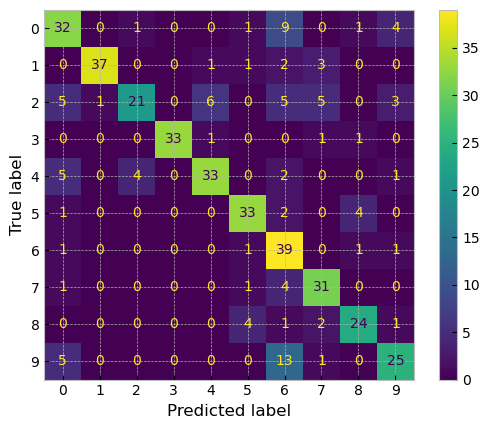

<Figure size 1000x700 with 0 Axes>

In [5]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.figure(figsize = (10,7))
plt.show()


## 2.Vehicle object detection

In [2]:
cars = tf.keras.models.load_model('Models/Car_detection_380_nocars.h5')

2023-12-06 23:36:58.971798: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79087 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2023-12-06 23:36:58.975693: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 79087 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


In [3]:
#Function to compute Intersection over union.
def IOU(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    w_intersection = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_intersection = min(y1 + h1, y2 + h2) - max(y1, y2)

    if w_intersection <= 0 or h_intersection <= 0: 
        return 0

    Intersection = w_intersection * h_intersection
    Union = w1 * h1 + w2 * h2 - Intersection
    return Intersection / Union

1/1 [==============================] - 0s 27ms/step


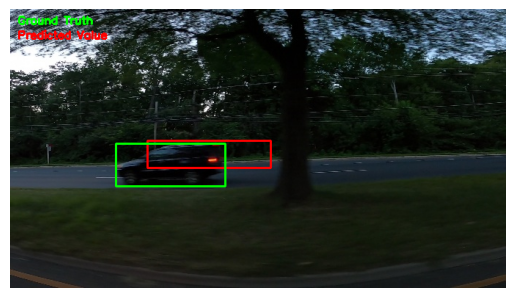

IOU for imagevid_5_27920.jpg:  0.5620777788383019
1/1 [==============================] - 0s 25ms/step


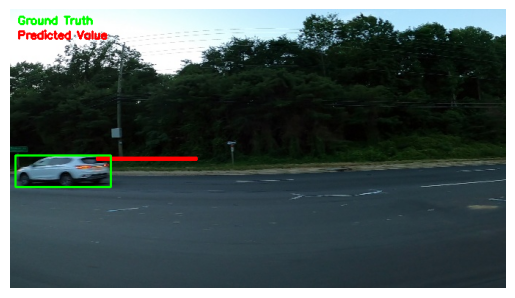

IOU for imagevid_5_28260.jpg:  0.06671339524870454
1/1 [==============================] - 0s 27ms/step


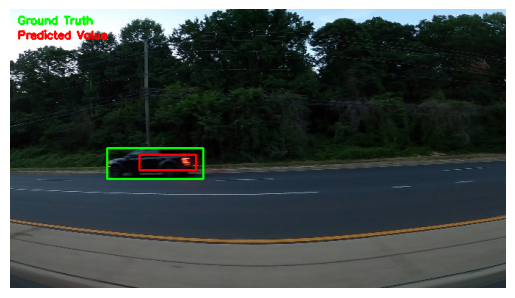

IOU for imagevid_5_28420.jpg:  0.7032507808032376


In [6]:
#Displaying bounding box

bbox = pd.read_csv('car_detection_dataset/makesense_test.csv')

images = list(bbox['image_name'])

t_test = bbox.drop('image_name', axis=1).round().to_numpy().astype(int)
t_test = t_test.astype(float)

#Printing IOU for Region of Interest
i = 1

for image in images[:3]:
    filename='car_detection_dataset/testing_images/'+image
    img = np.array(Image.open(filename))
    (h,w,c) = img.shape
    img = np.array(img)
    index = (bbox.index[bbox['image_name']==image][0])
    predicted_bbox = cars.predict(np.expand_dims(img, axis=0))
    ground_truth = t_test[index]
    ground_truth = ground_truth.astype(int)

    predicted_bbox = predicted_bbox*(w,h,w,h)
    predicted_bbox = predicted_bbox.astype(int)
    
    cv2.putText(img, f"Ground Truth", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(img, f"Predicted Value", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    cv2.rectangle(img, (predicted_bbox[0][0],  predicted_bbox[0][1]), 
              ( predicted_bbox[0][2],  predicted_bbox[0][3]), 
              (255, 0, 0), 2);
    
    cv2.rectangle(img, (ground_truth[0],  ground_truth[1]), 
              (ground_truth[2],  ground_truth[3]), 
              (0, 255, 0), 2);

    # Display the image on the corresponding subplot
    plt.imshow(img)
    plt.axis('off')
    
    plt.show()
    
    
    i = i+1

    # Show the plot
    # plt.show()

    iou = IOU(ground_truth, predicted_bbox[0])
    print('IOU for image' +image+': ', iou)
